In [1]:
import zipfile
import os
archive_1 = zipfile.ZipFile('Выборка_хорроров.zip', 'r')
archive_1.extractall()
archive_1.close()
archive_2 = zipfile.ZipFile('Выборка_фанфиков.zip', 'r')
archive_2.extractall()
archive_2.close()
archive_3 = zipfile.ZipFile('Выборка_фанфиков_2.zip', 'r')
archive_3.extractall()
archive_3.close()
archive_4 = zipfile.ZipFile('Выборка_приключений.zip', 'r')
archive_4.extractall()
archive_4.close()

In [2]:
#os.listdir('.')
curr_dir = os.getcwd()
#list(os.walk(curr_dir))

In [3]:
import nltk
nltk.download('stopwords')

import re  
import numpy

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [5]:
!pip install razdel
from razdel import sentenize, tokenize
import re
import numpy as np

from bs4 import BeautifulSoup

def text_tokenizer(text):
  text = re.sub('>','> ', text)
  text = re.sub('<',' <', text)
  text = re.sub('\n', ' ', text) # удаляем разбиение строки
  text = ' '.join([word for word in text.lower().split() if word not in cachedStopWords]) # удаляем стоп-слова
  text = re.sub('[.,&:;?"\'\(\)\[\]\-+=1234567890!@#$%^&*_~`]',' ',text) # удаляем знаки препинания
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()
  text = list(tokenize(text))
  #lemmies = []
  #for word in text.split():
  #  p = morph.parse(word)[0]
  #  lemmies.append(p.normal_form) # Лемматизация
  #tokens = list(tokenize(' '.join(lemmies)))
  #text = ' '.join(tokens)
  return ' '.join([_.text for _ in text])

In [6]:
import pandas as pd
table = pd.DataFrame()

genres = []
filenames = []
texts = []
lemmatizations = []


for root, dirs, files in os.walk(curr_dir):
    for name in files:
        joined_path = str(os.path.join(root, name))
        if joined_path.endswith('.txt'):
          with open(joined_path, 'r', encoding='utf-8-sig') as f:
            text = f.read()
            texts.append(text)
            vector = text_tokenizer(text)
            genres.append(os.path.basename(root))
            filenames.append(name)
            lemmatizations.append(vector)

print(lemmatizations)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
table['Жанр'] = genres
table['Имя файла'] = filenames
table['Текст'] = texts
table['Токенизация'] = lemmatizations

table

,Жанр,Имя файла,Текст,Токенизация
0,Fanfics,molxfarkakashis_lesson.txt,\n\n\n\n\n\n\nAnnotation\n\n\nУрок Какаши\n\n\...,annotation урок какаши урок какаши узрите всё ...
1,Fanfics,lord_w_ipeschernojstrazhi.txt,\n\n\nПес Черной Стражи\n\n\nАвтор: геккон-ur1...,пес черной стражи автор геккон ur ka фэндом ро...
2,Fanfics,lerh_i_ap_me_54.txt,"\n\nГлава 54: Новерия: станция ""Расселина""\n\n...",глава новерия станция расселина монорельс мерн...
3,Fanfics,maximum_sthedirtyname.txt,\n\n\n\n\n\n\nПримечание автора.\nЭто началось...,примечание автора это началось простой идеи чт...
4,Fanfics,morozow_ataksluchilosx.txt,"\n\n \n \n\n\n\n\n\n***Где-то, неизвестно где*...",где то неизвестно где нет это заработал мир со...
...,...,...,...,...
595,Fanfics_2,chernow_k_nwar1898.txt,\nИСПАНО-АМЕРИКАНСКАЯ ВОЙНА В МИРЕ ИМПЕРАТОРА ...,испано американская война мире императора влад...
596,Fanfics_2,andrej_s_mxz5.txt,"\nПродираю один глаз, пытаясь определиться с и...",продираю глаз пытаясь определиться источником ...
597,Fanfics_2,alishkewich_oprijutmenestreljachudowishnajaist...,"\n\n\n1\n\nВсё, что ни делается - всё... должн...",всё делается всё должно приносить прибыль земн...
598,Fanfics_2,chitatelj01_yunmi_ng.txt,\n\n\nЮнМи и Новый Год.\n\n Время действия: 31...,юнми новый год время действия декабря место де...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from sklearn.decomposition import PCA

In [10]:
corpus = table['Токенизация'].values.tolist()
m = corpus

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(m)

print(len(X.toarray()))

600


In [11]:
from sklearn.manifold import TSNE

In [12]:
table[:500]

,Жанр,Имя файла,Текст,Токенизация
0,Fanfics,molxfarkakashis_lesson.txt,\n\n\n\n\n\n\nAnnotation\n\n\nУрок Какаши\n\n\...,annotation урок какаши урок какаши узрите всё ...
1,Fanfics,lord_w_ipeschernojstrazhi.txt,\n\n\nПес Черной Стражи\n\n\nАвтор: геккон-ur1...,пес черной стражи автор геккон ur ka фэндом ро...
2,Fanfics,lerh_i_ap_me_54.txt,"\n\nГлава 54: Новерия: станция ""Расселина""\n\n...",глава новерия станция расселина монорельс мерн...
3,Fanfics,maximum_sthedirtyname.txt,\n\n\n\n\n\n\nПримечание автора.\nЭто началось...,примечание автора это началось простой идеи чт...
4,Fanfics,morozow_ataksluchilosx.txt,"\n\n \n \n\n\n\n\n\n***Где-то, неизвестно где*...",где то неизвестно где нет это заработал мир со...
...,...,...,...,...
495,Fanfics_2,balakin_andrej_w1112299naruto5.txt,"\n\n\n \n \n\n\n\n Приди, приди Рай - 5. Гласн...",приди приди рай гласность конохе повзрослевший...
496,Fanfics_2,antidepressantkarnawal012.txt,\nАрка 4. Общество Душ\n\n Глава 33: Соперник....,арка общество душ глава соперник построились т...
497,Fanfics_2,boris_shahow53453534535.txt,\nГлава 1. Пришёл\n\n\nПролог\n\nДождевая вода...,глава пришёл пролог дождевая вода тонкой струй...
498,Fanfics_2,chernjaewa_e_acokchastx6igrysshinigami.txt,\n\n\n\n\nОфициальная гамма фанфика - Алексей ...,официальная гамма фанфика алексей павлов также...


In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

g_c = ('red ' * 150 + 'blue ' * 150 + 'purple ' * 150 + 'green ' * 150).split(' ')[:-1]
def get_plots(data):
  pca = PCA(n_components=2).fit_transform(data.todense())
  tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data.todense()))
  f, ax = plt.subplots(1, 2, figsize = (14,6))
  ax[0].scatter(pca[:, 0], pca[:, 1], c = g_c, label = ['Fanfics_2',
                                                          'Fanfics',
                                                          'Horror',
                                                          'Adventures'])
  ax[0].set_title('График PCA')
    
  ax[1].scatter(tsne[:, 0], tsne[:, 1], c = g_c, label = ['Fanfics_2',
                                                          'Fanfics',
                                                          'Horror',
                                                          'Adventures'])
  ax[1].set_title('График t-SNE')

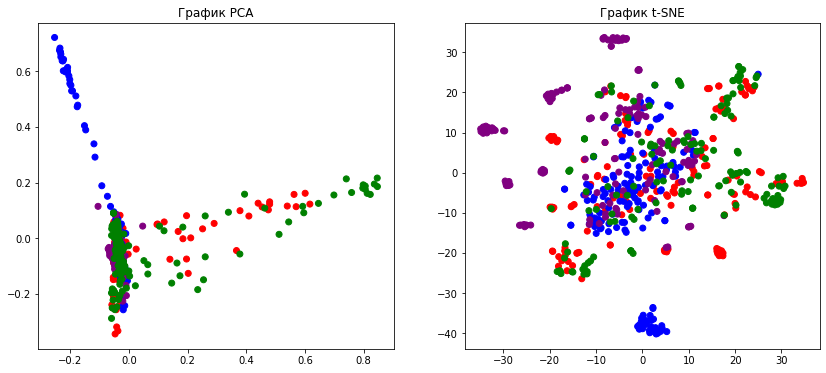

In [14]:
get_plots(X)

# Задание 2

In [15]:
emails = pd.read_csv('Emails.csv',sep=',')

In [16]:
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

In [17]:
from gensim.models.ldamodel import LdaModel

from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vec = CountVectorizer()
vec2 = TfidfVectorizer()
#z = emails['MetadataSubject']

#z = z[~numpy.isnan(z)]

X = vec.fit_transform(emails.RawText.tolist())
X2 = vec2.fit_transform(emails.RawText.tolist())
#print(X.toarray())

#print(emails['RawText'])

In [30]:
import gensim
from scipy.sparse import csc

corpus = gensim.matutils.Sparse2Corpus(X)

corpus_2 = gensim.matutils.Sparse2Corpus(X2)

dictionary = gensim.corpora.Dictionary.from_corpus(
    corpus, id2word=dict(
        [(i, s) for i, s in enumerate(vec.get_feature_names())]))

dictionary2 = gensim.corpora.Dictionary.from_corpus(
    corpus_2, id2word=dict(
        [(i, s) for i, s in enumerate(vec2.get_feature_names())]))

In [32]:
#import numpy as np

from gensim import matutils
from gensim.models.ldamodel import LdaModel
from sklearn import linear_model
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

lda = LdaModel(matutils.Sparse2Corpus(X.T), num_topics=5,
                    passes=10,
                    id2word=dict([(i,s) for i, s in enumerate(vec.get_feature_names())]),
               per_word_topics = True)

lda.print_topics()

[(0,
  '0.010*"state" + 0.008*"department" + 0.007*"case" + 0.007*"date" + 0.007*"unclassified" + 0.007*"2015" + 0.007*"doc" + 0.007*"2014" + 0.006*"20439" + 0.006*"31"'),
 (1,
  '0.044*"state" + 0.027*"date" + 0.027*"department" + 0.027*"doc" + 0.026*"unclassified" + 0.026*"case" + 0.026*"2015" + 0.026*"sent" + 0.026*"20439" + 0.026*"2014"'),
 (2,
  '0.009*"state" + 0.009*"said" + 0.008*"case" + 0.008*"department" + 0.007*"date" + 0.007*"unclassified" + 0.007*"20439" + 0.007*"2014" + 0.007*"doc" + 0.007*"2015"'),
 (3,
  '0.020*"state" + 0.014*"2015" + 0.010*"benghazi" + 0.010*"subject" + 0.010*"information" + 0.009*"sensitive" + 0.008*"agreement" + 0.008*"05" + 0.008*"13" + 0.008*"dept"'),
 (4,
  '0.022*"pm" + 0.018*"state" + 0.015*"department" + 0.015*"secretary" + 0.014*"30" + 0.011*"office" + 0.010*"10" + 0.009*"unclassified" + 0.009*"case" + 0.009*"date"')]

In [31]:
lda2 = LdaModel(matutils.Sparse2Corpus(X2.T), num_topics=5,
                    passes=10,
                    id2word=dict([(i,s) for i, s in enumerate(vec2.get_feature_names())]),
               per_word_topics = True)


#lda = fit_lda(X, dictionary)
#print_topics(lda, dictionary)
lda2.print_topics()

[(0,
  '0.000*"twittering" + 0.000*"que" + 0.000*"rp" + 0.000*"estados" + 0.000*"unidos" + 0.000*"pan" + 0.000*"las" + 0.000*"para" + 0.000*"sejm" + 0.000*"pani"'),
 (1,
  '0.012*"state" + 0.008*"31" + 0.008*"08" + 0.008*"20439" + 0.008*"2014" + 0.007*"date" + 0.007*"2015" + 0.007*"doc" + 0.007*"department" + 0.007*"case"'),
 (2,
  '0.001*"office" + 0.001*"mashabane" + 0.001*"depart" + 0.001*"arrive" + 0.001*"00" + 0.001*"en" + 0.001*"route" + 0.001*"residence" + 0.001*"room" + 0.001*"davutoglu"'),
 (3,
  '0.001*"mikulski" + 0.000*"bam" + 0.000*"fminister" + 0.000*"gail" + 0.000*"drozdiak" + 0.000*"widmer" + 0.000*"dir" + 0.000*"c05767921" + 0.000*"barb" + 0.000*"cvsg"'),
 (4,
  '0.004*"state" + 0.003*"08" + 0.003*"31" + 0.003*"department" + 0.003*"2015" + 0.003*"case" + 0.003*"2010" + 0.003*"date" + 0.003*"unclassified" + 0.003*"doc"')]

In [33]:
#emails
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
#vis
#emails

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.159762  0.177481       1        1  28.354598
0     -0.118865 -0.107495       2        1  28.128777
2     -0.086378 -0.106669       3        1  22.431913
4      0.160930  0.026017       4        1  12.817839
1      0.204074  0.010666       5        1   8.266873, topic_info=          Term          Freq         Total Category  logprob  loglift
53915    state  30899.000000  30899.000000  Default  30.0000  30.0000
54479  subject  11300.000000  11300.000000  Default  29.0000  29.0000
1626     20439  12590.000000  12590.000000  Default  28.0000  28.0000
1577      2014  12650.000000  12650.000000  Default  27.0000  27.0000
51712     sent   7391.000000   7391.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
19030       cc    932.676640   2239.444669   Topic5  -5.1250   1.6170
8013        b6    935.838341   2323.665766   Topic5  -5.1216   1.5835
45007       pm   1310.762313   7955.191418   Topic5  -4.7847   0.6897
269         06    962.312010   2571.103346   Topic5  -5.0937   1.5102
2348        30   1044.247464   5367.693181   Topic5  -5.0120   0.8558

[414 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
0          1  0.011619      00
0          2  0.010690      00
0          3  0.019055      00
0          4  0.902106      00
0          5  0.056236      00
...      ...       ...     ...
60955      1  0.998905   yunus
61058      1  0.002541  zelaya
61058      3  0.995926  zelaya
61058      5  0.002541  zelaya
61092      1  0.996441   zidan

[1076 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 5, 2])

In [36]:
vis2 = pyLDAvis.gensim.prepare(lda2, corpus_2, dictionary2)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.116462 -0.078653       1        1  46.125834
2     -0.075490  0.000322       2        1  27.828530
0     -0.073747 -0.002246       3        1  11.032619
3     -0.073668 -0.002453       4        1   8.425975
1      0.106442  0.083031       5        1   6.587041, topic_info=             Term        Freq       Total Category  logprob  loglift
53915       state  173.000000  173.000000  Default  30.0000  30.0000
2392           31  117.000000  117.000000  Default  29.0000  29.0000
333            08  118.000000  118.000000  Default  28.0000  28.0000
23248  department  111.000000  111.000000  Default  27.0000  27.0000
1626        20439  104.000000  104.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
306            07   14.368414   43.890660   Topic5  -5.6212   1.6034
48100     release   13.727385   41.975073   Topic5  -5.6669   1.6024
45007          pm   14.503684   64.204917   Topic5  -5.6119   1.2324
8013           b6   11.598995   37.171546   Topic5  -5.8353   1.5554
54700    sullivan   11.786409   43.022579   Topic5  -5.8193   1.4253

[277 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
0          1  0.319676          00
0          2  0.575416          00
0          5  0.095903          00
269        1  0.605629          06
269        2  0.025235          06
...      ...       ...         ...
58759      5  0.832940    valmorou
59624      1  0.965319  washington
60452      1  0.988865       world
60752      5  0.729208        yang
60795      1  0.968353        year

[285 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2])